# Predicting Gamer Behavior

Dataset: https://www.kaggle.com/datasets/rabieelkharoua/predict-online-gaming-behavior-dataset

## Data Preprocessing

In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [90]:
gamer = pd.read_csv("online_gaming_behavior_dataset.csv")
df = gamer.copy()

In [91]:
df.head()

,PlayerID,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
0,9000,43,Male,Other,Strategy,16.271119,0,Medium,6,108,79,25,Medium
1,9001,29,Female,USA,Strategy,5.525961,0,Medium,5,144,11,10,Medium
2,9002,22,Female,USA,Sports,8.223755,0,Easy,16,142,35,41,High
3,9003,35,Male,USA,Action,5.265351,1,Easy,9,85,57,47,Medium
4,9004,33,Male,Europe,Action,15.531945,0,Medium,2,131,95,37,Medium


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40034 entries, 0 to 40033
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PlayerID                   40034 non-null  int64  
 1   Age                        40034 non-null  int64  
 2   Gender                     40034 non-null  object 
 3   Location                   40034 non-null  object 
 4   GameGenre                  40034 non-null  object 
 5   PlayTimeHours              40034 non-null  float64
 6   InGamePurchases            40034 non-null  int64  
 7   GameDifficulty             40034 non-null  object 
 8   SessionsPerWeek            40034 non-null  int64  
 9   AvgSessionDurationMinutes  40034 non-null  int64  
 10  PlayerLevel                40034 non-null  int64  
 11  AchievementsUnlocked       40034 non-null  int64  
 12  EngagementLevel            40034 non-null  object 
dtypes: float64(1), int64(7), object(5)
memory usag

In [93]:
# There are no missing values.

In [94]:
df.shape

(40034, 13)

In [95]:
df.nunique()

PlayerID                     40034
Age                             35
Gender                           2
Location                         4
GameGenre                        5
PlayTimeHours                40034
InGamePurchases                  2
GameDifficulty                   3
SessionsPerWeek                 20
AvgSessionDurationMinutes      170
PlayerLevel                     99
AchievementsUnlocked            50
EngagementLevel                  3
dtype: int64

In [96]:
df.select_dtypes(include=["object"]).nunique()

Gender             2
Location           4
GameGenre          5
GameDifficulty     3
EngagementLevel    3
dtype: int64

In [97]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PlayerID,40034.0,29016.500000,11556.964675,9000.000000,19008.250000,29016.500000,39024.750000,49033.000000
Age,40034.0,31.992531,10.043227,15.000000,23.000000,32.000000,41.000000,49.000000
PlayTimeHours,40034.0,12.024365,6.914638,0.000115,6.067501,12.008002,17.963831,23.999592
InGamePurchases,40034.0,0.200854,0.400644,0.000000,0.000000,0.000000,0.000000,1.000000
SessionsPerWeek,40034.0,9.471774,5.763667,0.000000,4.000000,9.000000,14.000000,19.000000
AvgSessionDurationMinutes,40034.0,94.792252,49.011375,10.000000,52.000000,95.000000,137.000000,179.000000
PlayerLevel,40034.0,49.655568,28.588379,1.000000,25.000000,49.000000,74.000000,99.000000
AchievementsUnlocked,40034.0,24.526477,14.430726,0.000000,12.000000,25.000000,37.000000,49.000000


In [98]:
# We won't need "PlayerID" column

df = df.drop(columns=["PlayerID"])

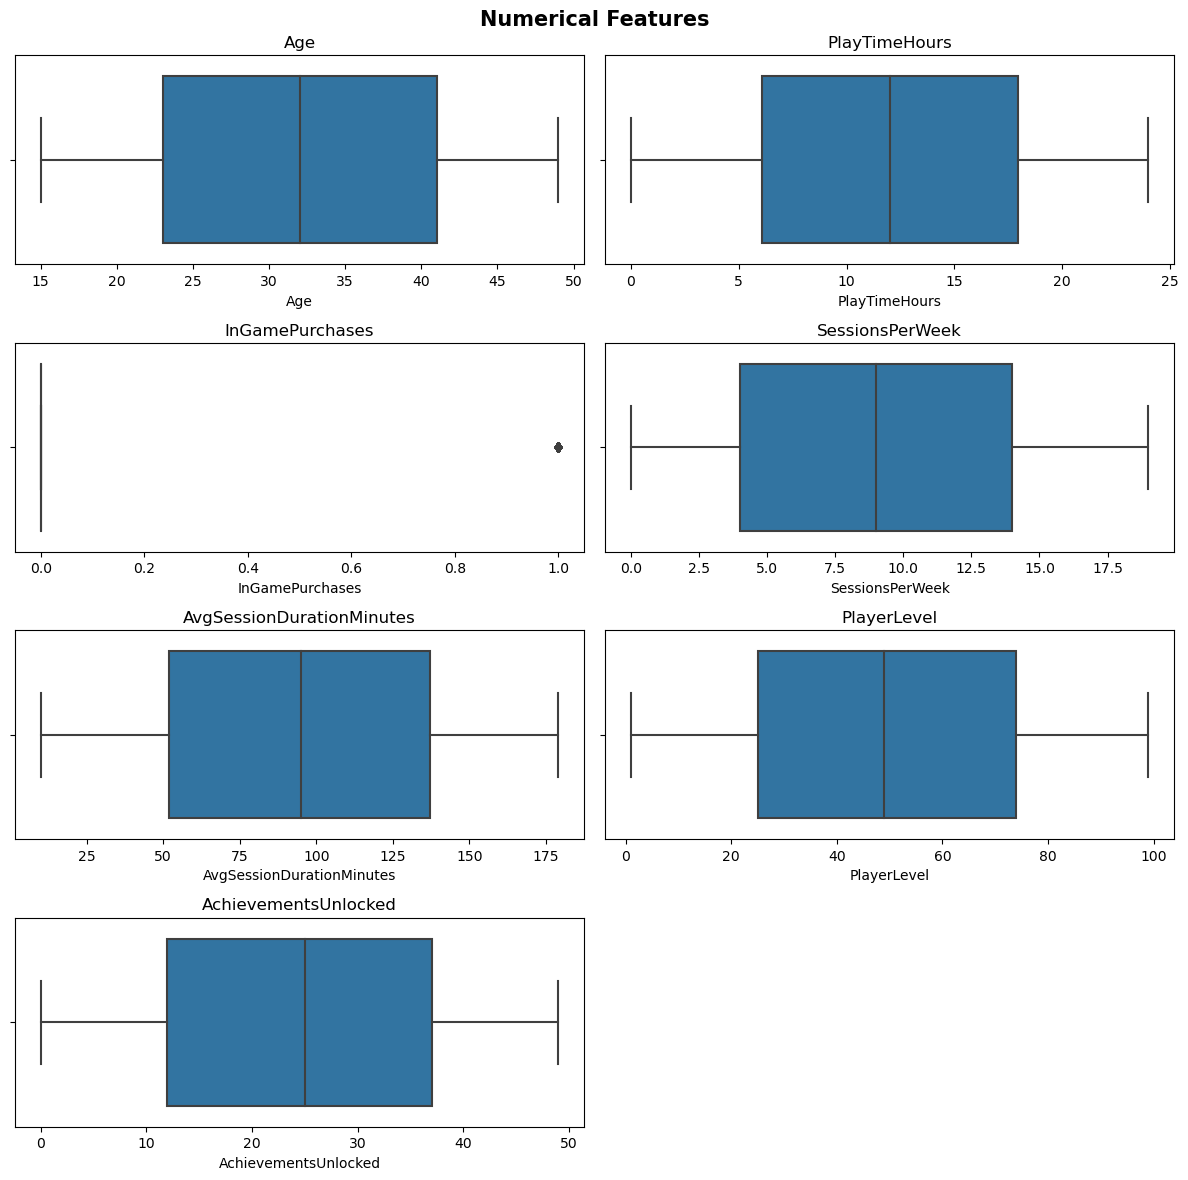

In [99]:
fig, axes = plt.subplots(4, 2, figsize=(12, 12))

for i, column in enumerate(df.select_dtypes(include=["int64", "float64"])):
    sns.boxplot(x=df[column], ax=axes[i // 2, i % 2])
    axes[i // 2, i % 2].set_title(column)
    
for i in range(len(df.select_dtypes(include=["int64", "float64"]).columns), 4 * 2):
    fig.delaxes(axes[i // 2, i % 2])
    
plt.suptitle("Numerical Features", fontsize=15, fontweight="bold")
plt.tight_layout()
plt.show()

In [100]:
for i, column in enumerate(df.select_dtypes(include=["object"])):
    print(df[column].value_counts())
    print("\n")

Gender
Male      23959
Female    16075
Name: count, dtype: int64


Location
USA       16000
Europe    12004
Asia       8095
Other      3935
Name: count, dtype: int64


GameGenre
Sports        8048
Action        8039
Strategy      8012
Simulation    7983
RPG           7952
Name: count, dtype: int64


GameDifficulty
Easy      20015
Medium    12011
Hard       8008
Name: count, dtype: int64


EngagementLevel
Medium    19374
High      10336
Low       10324
Name: count, dtype: int64




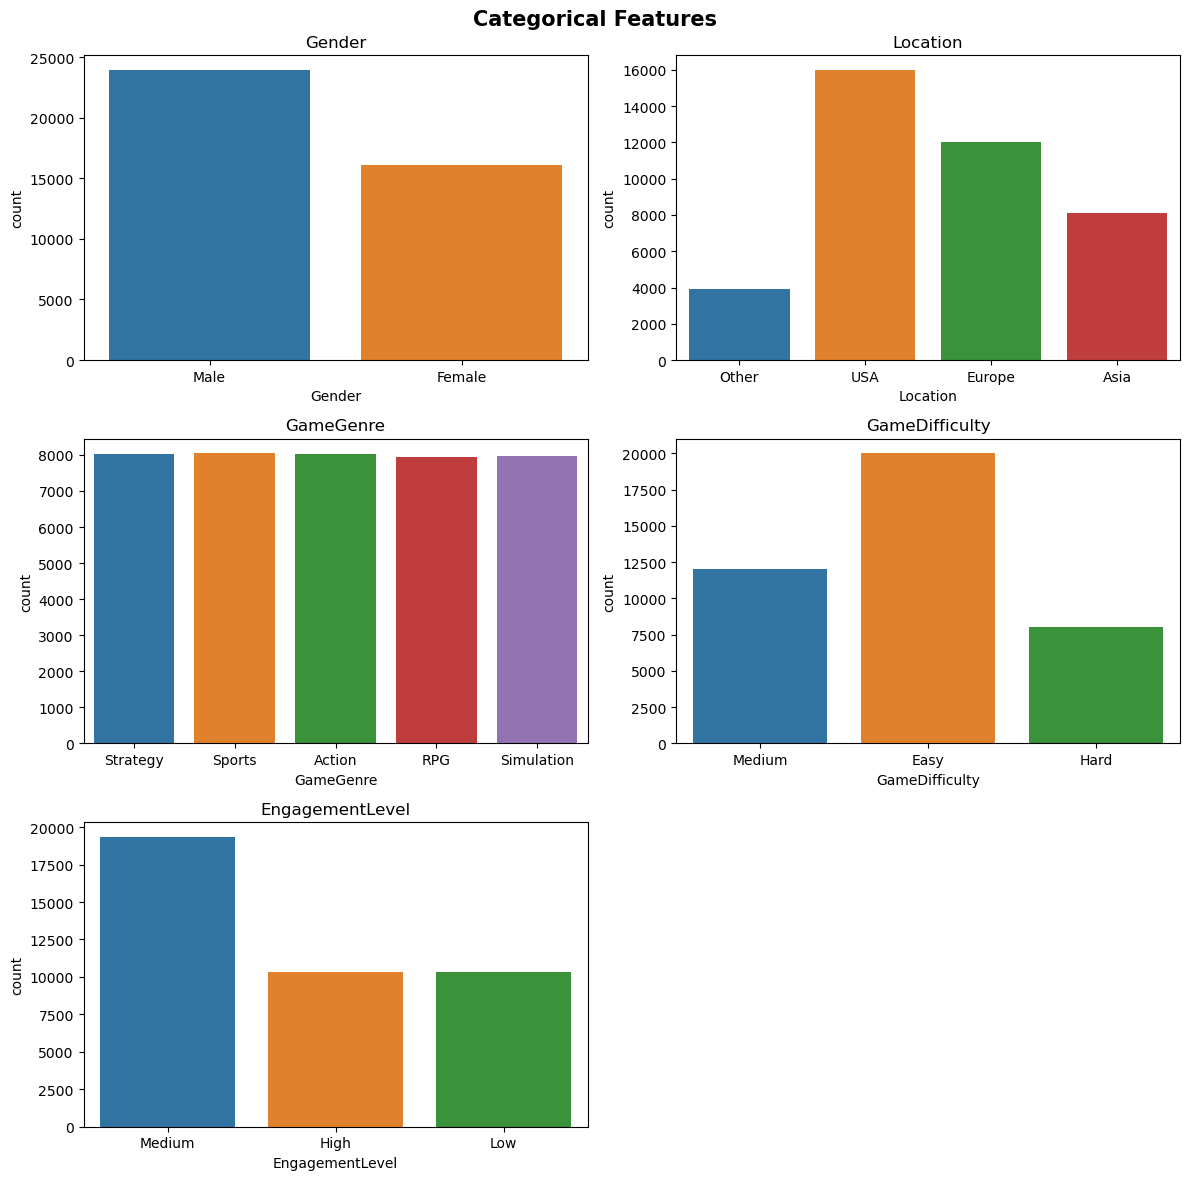

In [101]:
fig, axes = plt.subplots(3, 2, figsize=(12, 12))

for i, column in enumerate(df.select_dtypes(include=["object"])):
    sns.countplot(x=df[column], ax=axes[i // 2, i % 2])
    axes[i // 2, i % 2].set_title(column)
    
for i in range(len(df.select_dtypes(include=["object"]).columns), 3 * 2):
    fig.delaxes(axes[i // 2, i % 2])
    
plt.suptitle("Categorical Features", fontsize=15, fontweight="bold")
plt.tight_layout()
plt.show()

In [102]:
# There are no outliers for both numerical and categorical features.

## Analyzing Relasionships

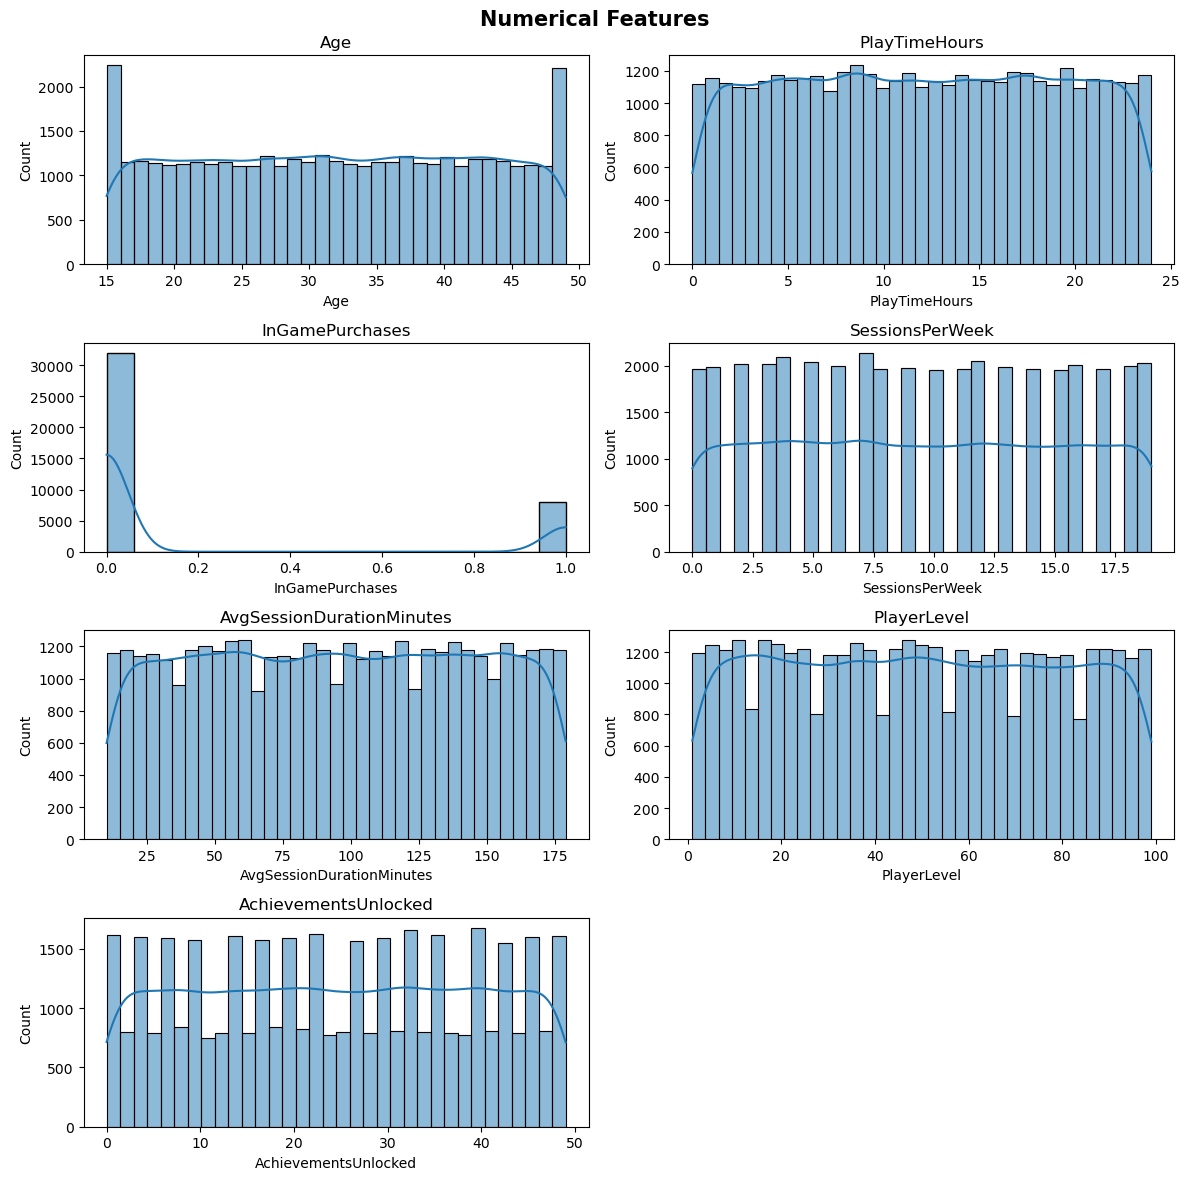

In [103]:
fig, axes = plt.subplots(4, 2, figsize=(12, 12))

for i, column in enumerate(df.select_dtypes(include=["int64", "float64"])):
    sns.histplot(x=df[column], kde=True, ax=axes[i // 2, i % 2])
    axes[i // 2, i % 2].set_title(column)
    
for i in range(len(df.select_dtypes(include=["int64", "float64"]).columns), 4 * 2):
    fig.delaxes(axes[i // 2, i % 2])
    
plt.suptitle("Numerical Features", fontsize=15, fontweight="bold")
plt.tight_layout()
plt.show()

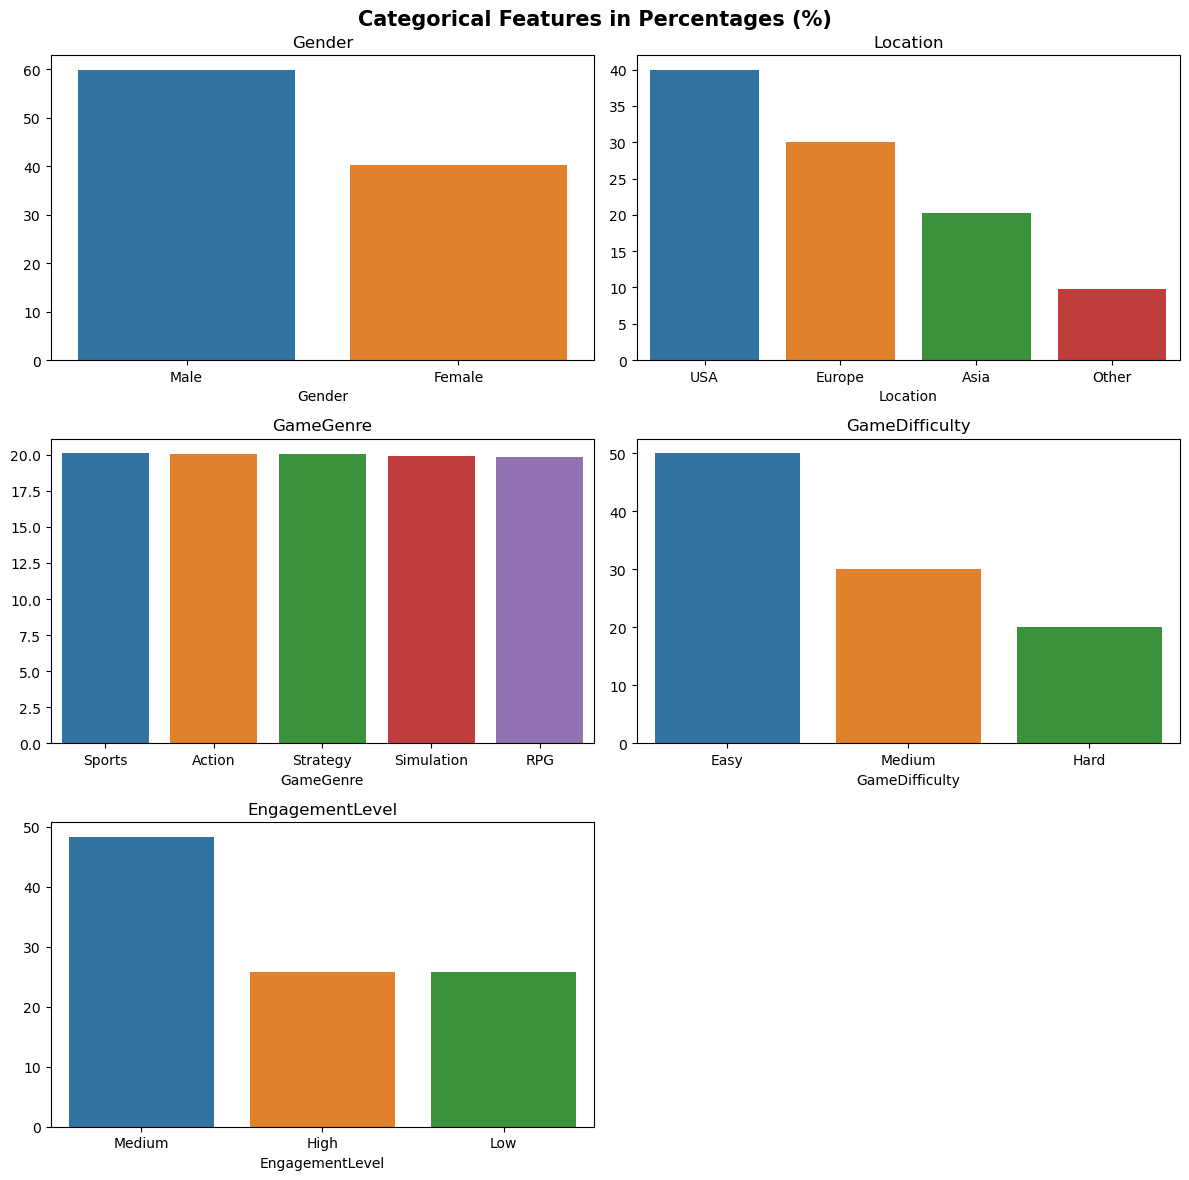

In [104]:
# In Percentages

fig, axes = plt.subplots(3, 2, figsize=(12, 12))

for i, column in enumerate(df.select_dtypes(include=["object"])):
    category_counts = df[column].value_counts(normalize=True) * 100
    
    sns.barplot(data=df, x=category_counts.index, y=category_counts.values, ax=axes[i // 2, i % 2])
    axes[i // 2, i % 2].set_title(column)
    
for i in range(len(df.select_dtypes(include=["object"]).columns), 3 * 2):
    fig.delaxes(axes[i // 2, i % 2])
    
plt.suptitle("Categorical Features in Percentages (%)", fontsize=15, fontweight="bold")
plt.tight_layout()
plt.show()

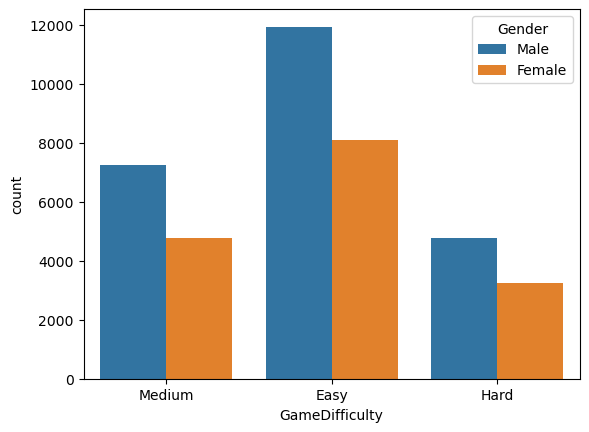

In [105]:
sns.countplot(data=df, x="GameDifficulty", hue="Gender")
plt.show()

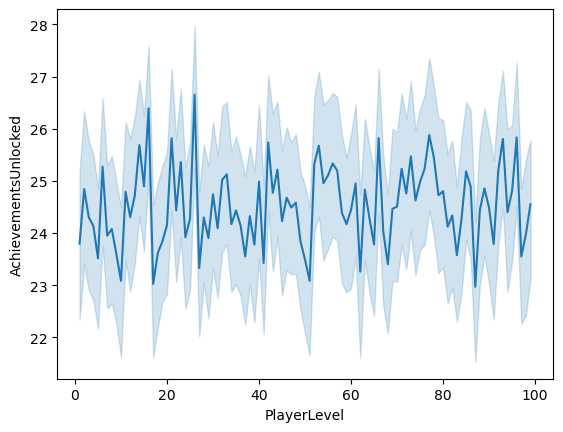

In [106]:
sns.lineplot(data=df, x="PlayerLevel", y="AchievementsUnlocked")
plt.show()

## Dummy

In [107]:
df.dtypes

Age                            int64
Gender                        object
Location                      object
GameGenre                     object
PlayTimeHours                float64
InGamePurchases                int64
GameDifficulty                object
SessionsPerWeek                int64
AvgSessionDurationMinutes      int64
PlayerLevel                    int64
AchievementsUnlocked           int64
EngagementLevel               object
dtype: object

In [110]:
df = pd.get_dummies(df, columns=["Gender", "Location", "GameGenre", "GameDifficulty"])
df = df.astype({col: "int64" for col in df.columns if df[col].dtype == "bool"})

In [111]:
df.dtypes

Age                            int64
PlayTimeHours                float64
InGamePurchases                int64
SessionsPerWeek                int64
AvgSessionDurationMinutes      int64
PlayerLevel                    int64
AchievementsUnlocked           int64
EngagementLevel               object
Gender_Female                  int64
Gender_Male                    int64
Location_Asia                  int64
Location_Europe                int64
Location_Other                 int64
Location_USA                   int64
GameGenre_Action               int64
GameGenre_RPG                  int64
GameGenre_Simulation           int64
GameGenre_Sports               int64
GameGenre_Strategy             int64
GameDifficulty_Easy            int64
GameDifficulty_Hard            int64
GameDifficulty_Medium          int64
dtype: object

In [112]:
mapping = {"Low": 1, "Medium": 2, "High": 3}
df["EngagementLevel"] = df["EngagementLevel"].map(mapping).astype("int64")

In [113]:
df.dtypes

Age                            int64
PlayTimeHours                float64
InGamePurchases                int64
SessionsPerWeek                int64
AvgSessionDurationMinutes      int64
PlayerLevel                    int64
AchievementsUnlocked           int64
EngagementLevel                int64
Gender_Female                  int64
Gender_Male                    int64
Location_Asia                  int64
Location_Europe                int64
Location_Other                 int64
Location_USA                   int64
GameGenre_Action               int64
GameGenre_RPG                  int64
GameGenre_Simulation           int64
GameGenre_Sports               int64
GameGenre_Strategy             int64
GameDifficulty_Easy            int64
GameDifficulty_Hard            int64
GameDifficulty_Medium          int64
dtype: object

In [114]:
df.head()

,Age,PlayTimeHours,InGamePurchases,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel,Gender_Female,Gender_Male,...,Location_Other,Location_USA,GameGenre_Action,GameGenre_RPG,GameGenre_Simulation,GameGenre_Sports,GameGenre_Strategy,GameDifficulty_Easy,GameDifficulty_Hard,GameDifficulty_Medium
0,43,16.271119,0,6,108,79,25,2,0,1,...,1,0,0,0,0,0,1,0,0,1
1,29,5.525961,0,5,144,11,10,2,1,0,...,0,1,0,0,0,0,1,0,0,1
2,22,8.223755,0,16,142,35,41,3,1,0,...,0,1,0,0,0,1,0,1,0,0
3,35,5.265351,1,9,85,57,47,2,0,1,...,0,1,1,0,0,0,0,1,0,0
4,33,15.531945,0,2,131,95,37,2,0,1,...,0,0,1,0,0,0,0,0,0,1


In [115]:
df["EngagementLevel"].value_counts()

EngagementLevel
2    19374
3    10336
1    10324
Name: count, dtype: int64

## Modeling

In [116]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [117]:
y = df["EngagementLevel"]
X = df.drop(columns=["EngagementLevel"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

### Random Forests

In [118]:
from sklearn.ensemble import RandomForestClassifier

In [119]:
rf_model = RandomForestClassifier(random_state=42)

In [123]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

In [124]:
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid,
                           cv=10, scoring="accuracy", n_jobs=-1, verbose=2)

In [125]:
grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 16 candidates, totalling 160 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [None, 10], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='accuracy', verbose=2)

In [126]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters: ", best_params)
print("Best Score: ", best_score)

Best Parameters:  {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Score:  0.8989508714691926


In [127]:
best_rf_model = RandomForestClassifier(**best_params, random_state=42)
best_rf_model.fit(X_train, y_train)

y_pred_rf = best_rf_model.predict(X_test)

In [128]:
accuracy_score(y_test, y_pred_rf)

0.8924967529223699

In [129]:
confusion_matrix(y_test, y_pred_rf)

array([[2214,  321,   71],
       [ 148, 4508,  124],
       [  84,  328, 2211]], dtype=int64)

In [130]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           1       0.91      0.85      0.88      2606
           2       0.87      0.94      0.91      4780
           3       0.92      0.84      0.88      2623

    accuracy                           0.89     10009
   macro avg       0.90      0.88      0.89     10009
weighted avg       0.89      0.89      0.89     10009



In [131]:
# Cross Validation

In [134]:
best_rf_scores = cross_val_score(best_rf_model, X_train, y_train, cv=10, scoring="accuracy", n_jobs=-1, verbose=2)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:   14.5s remaining:   14.5s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   14.8s finished


In [135]:
print("Random Forest Cross-Validation Accuracy: %0.2f (+/- %0.2f)" % (best_rf_scores.mean(), best_rf_scores.std()))

Random Forest Cross-Validation Accuracy: 0.90 (+/- 0.00)
